In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from preprocessing import encoding
from model_functions import split_data

/home/macrodrigues/.pyenv/versions/3.9.5/envs/marco_venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


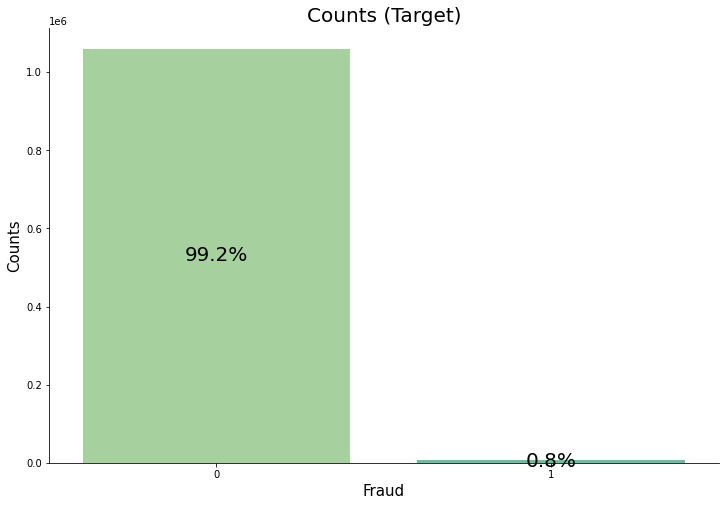

In [2]:
# IMPORT FROM CSV
df = pd.read_csv('data/data.csv')
df.drop([df.columns[0]], axis = 1, inplace=True)

# PLOT COUNTPLOT FOR TARGET
fig = plt.figure(figsize=(12, 8))
colors = [(160/255, 217/255, 149/255), (108/255, 196/255, 161/255)]
ax = sns.countplot(df['FRAUD'], palette=colors)
ax.set(title='Counts (Target)')
ax.title.set_size(20)  # Set title font size

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-label and y-label font size
ax.set_xlabel('Fraud', fontsize=15)
ax.set_ylabel('Counts', fontsize=15)

# Add percentages to the plot
total = len(df['FRAUD'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=20)

plt.show()

/home/macrodrigues/.pyenv/versions/3.9.5/envs/marco_venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


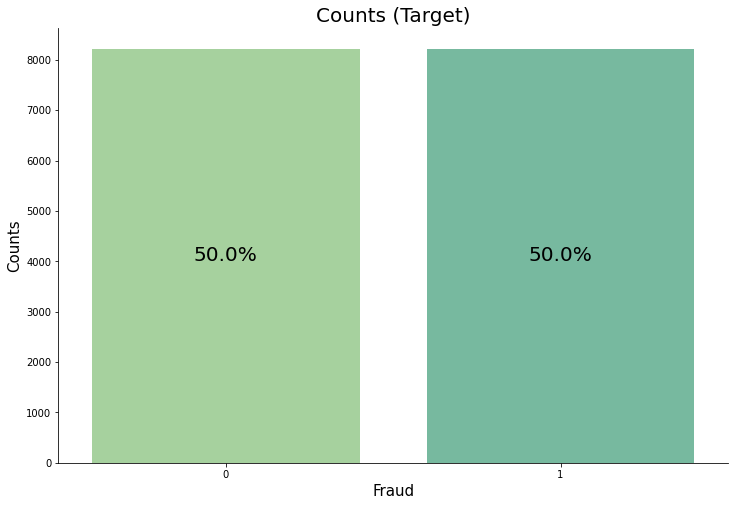

In [3]:
X = df.drop(['FRAUD'], axis=1)
y = df['FRAUD']

rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_resample(X, y)

fig = plt.figure(figsize=(12, 8))
colors = [(160/255, 217/255, 149/255), (108/255, 196/255, 161/255)]
ax = sns.countplot(
    y_rus, 
    palette=colors)
ax.set(title='Counts (Target)')
ax.title.set_size(20)  # Set title font size

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-label and y-label font size
ax.set_xlabel('Fraud', fontsize=15)
ax.set_ylabel('Counts', fontsize=15)

# Add percentages to the plot
total = len(y_rus)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=20)

plt.show()

In [4]:
df= pd.concat([X_rus, y_rus], axis=1)
df = encoding(df)
X = df[['AMOUNT_GBP',
    'countries_encoded',
    'user_year',
    'currencies_encoded', 
    'AGE_20-35', 
    'AGE_36-50', 
    'AGE_51-65',
    'AGE_66-80', 
    'STATE_COMPLETED', 
    'STATE_DECLINED', 
    'STATE_FAILED',
    'STATE_REVERTED', 
    'TYPE_ATM', 
    'TYPE_CARD_PAYMENT', 
    'TYPE_EXCHANGE',
    'TYPE_FEE', 
    'TYPE_TOPUP', 
    'TYPE_TRANSFER',
    'transaction_day_week_Friday', 
    'transaction_day_week_Monday',
    'transaction_day_week_Thursday', 
    'transaction_day_week_Tuesday',
    'transaction_day_week_Wednesday', 
    'transaction_day_week_Weekend']]
y = df['FRAUD']

In [5]:
X_train, X_test, y_train, y_test= split_data(X, y, split=0.3)

In [6]:
X_train.corr()

,AMOUNT_GBP,countries_encoded,user_year,currencies_encoded,AGE_20-35,AGE_36-50,AGE_51-65,AGE_66-80,STATE_COMPLETED,STATE_DECLINED,...,TYPE_EXCHANGE,TYPE_FEE,TYPE_TOPUP,TYPE_TRANSFER,transaction_day_week_Friday,transaction_day_week_Monday,transaction_day_week_Thursday,transaction_day_week_Tuesday,transaction_day_week_Wednesday,transaction_day_week_Weekend
AMOUNT_GBP,1.000000,0.133756,NaN,0.078993,-0.019873,0.001310,0.007486,0.046964,0.115826,0.000219,...,0.023693,-0.086100,-0.018582,0.089912,-0.006370,-0.022299,0.026928,-0.020476,0.005426,0.010771
countries_encoded,0.133756,1.000000,NaN,0.642816,0.142287,-0.127590,-0.031097,-0.020593,-0.029185,-0.036781,...,-0.066848,-0.027740,0.085514,0.091662,-0.019225,-0.000284,0.032788,0.012497,0.016829,-0.034161
user_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currencies_encoded,0.078993,0.642816,NaN,1.000000,0.168642,-0.144880,-0.054104,-0.006484,0.037686,-0.126990,...,-0.098465,-0.009761,0.145098,0.176016,-0.022584,0.029948,0.021435,0.022856,0.008132,-0.046187
AGE_20-35,-0.019873,0.142287,NaN,0.168642,1.000000,-0.741230,-0.424291,-0.177044,0.018476,-0.022493,...,-0.008773,-0.038373,0.004836,0.127225,-0.014475,0.032090,-0.000040,-0.002596,-0.005193,-0.007209
AGE_36-50,0.001310,-0.127590,NaN,-0.144880,-0.741230,1.000000,-0.221858,-0.092575,0.004011,0.034004,...,0.014720,0.016762,-0.022843,-0.075001,0.033487,-0.027197,-0.007674,0.007650,-0.002570,-0.002608
AGE_51-65,0.007486,-0.031097,NaN,-0.054104,-0.424291,-0.221858,1.000000,-0.052991,-0.024873,-0.017894,...,-0.009540,0.029903,0.017346,-0.081489,-0.023221,-0.004290,0.010287,-0.012992,0.015786,0.010223
AGE_66-80,0.046964,-0.020593,NaN,-0.006484,-0.177044,-0.092575,-0.052991,1.000000,-0.020855,0.010167,...,0.005035,0.013214,0.016378,-0.022259,-0.003803,-0.015430,0.001442,0.013435,-0.008805,0.010226
STATE_COMPLETED,0.115826,-0.029185,NaN,0.037686,0.018476,0.004011,-0.024873,-0.020855,1.000000,-0.290266,...,0.130057,0.171927,-0.391969,0.230425,0.015579,0.039295,-0.014370,0.000595,-0.013445,-0.020095
STATE_DECLINED,0.000219,-0.036781,NaN,-0.126990,-0.022493,0.034004,-0.017894,0.010167,-0.290266,1.000000,...,-0.037751,-0.049905,-0.297282,-0.030550,0.007498,0.005418,0.000079,0.003449,-0.019898,0.002802


### Pearson Correlation

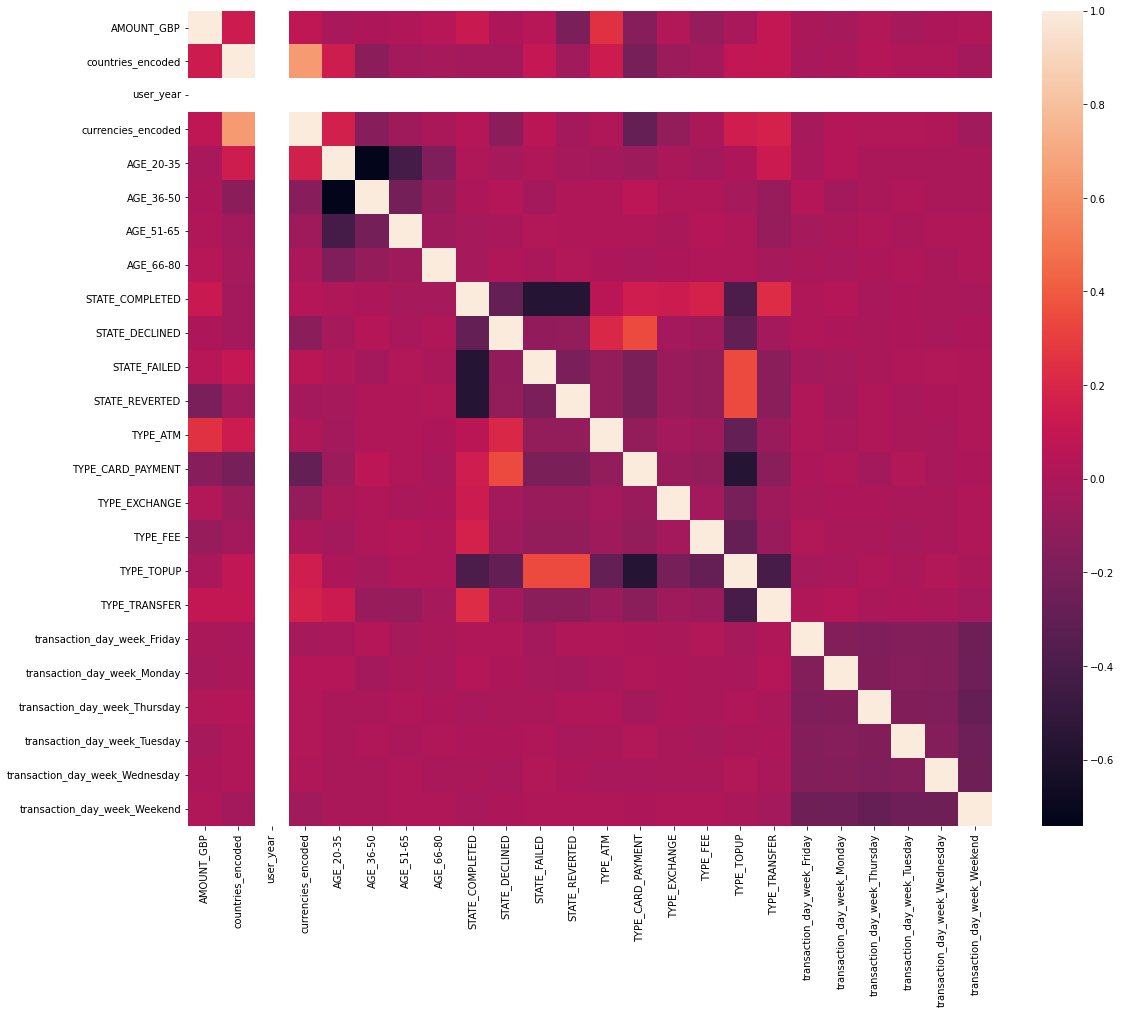

In [7]:
fig = plt.figure(figsize=(18, 15))
sns.heatmap(X_train.corr())
plt.show()

Cases of high correlation:

- countries_encoded too much correlated with countries_encoded (leave countries_encoded only)
- state_reverted and state_failed, can also be removed since they are very negatevly correlated with state_completed
- type_topup is negatively correlated with state_completed, Type_card payment and type transfer, so its also a good feature to remove


In [8]:
X = df[[
    'AMOUNT_GBP',
    'countries_encoded',
    'user_year', 
    'AGE_20-35', 
    'AGE_36-50', 
    'AGE_51-65',
    'AGE_66-80', 
    'STATE_COMPLETED', 
    'STATE_DECLINED', 
    'TYPE_ATM', 
    'TYPE_CARD_PAYMENT', 
    'TYPE_EXCHANGE',
    'TYPE_FEE', 
    'TYPE_TRANSFER',
    'transaction_day_week_Friday', 
    'transaction_day_week_Monday',
    'transaction_day_week_Thursday', 
    'transaction_day_week_Tuesday',
    'transaction_day_week_Wednesday', 
    'transaction_day_week_Weekend']]


X_train, X_test, y_train, y_test= split_data(X, y, split=0.3)

### Apply Model

In [12]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer

num_features = [
    'AMOUNT_GBP',
    'countries_encoded',
    'user_year']

num_transformer = Pipeline([
    ('scaler', MinMaxScaler())])

# Build preprocessor
preprocessor = ColumnTransformer([
    ('num_tr', num_transformer, num_features)])

In [28]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

pipe_random_forest = make_pipeline(preprocessor, RandomForestClassifier())
pipe_random_forest.fit(X_train, y_train)

cv_results = cross_validate(pipe_random_forest, X_train, y_train, cv = 20)

In [29]:
cv_results['test_score'].mean()

0.8347534722222223

In [30]:
# define evaluation
cv = RepeatedKFold(n_splits=20, n_repeats=3)

# define search space
space = dict()
space['alpha'] = [True, False]
space['max_features'] = ['sqrt', 'log2']
space['min_samples_leaf'] = [1, 2, 3, 4, 5]
space['n_estimators'] = [100, 150, 200, 300]


# define search
search = GridSearchCV(RandomForestClassifier(), space, n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

pipe = make_pipeline(
    preprocessor, 
    RandomForestClassifier()(
        alpha= result.best_params_['alpha'],
        learning_rate= result.best_params_['learning_rate']))

ValueError: Invalid parameter alpha for estimator RandomForestClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.

In [31]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])